In [ ]:
# Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from IPython.display import Image  
from sklearn import tree
import pydotplus
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from google.colab import files
file = files.upload()
import io
df = pd.read_csv(io.BytesIO(file['data.csv']))
df.head()

Saving data.csv to data (4).csv


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.drop('Unnamed: 32', axis = 1, inplace = True)

KeyError: ignored

In [ ]:
df['diagnosis'] = pd.factorize(df['diagnosis'])[0]
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


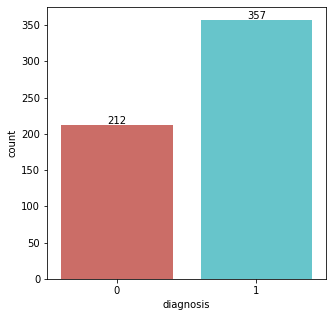

In [ ]:
# print(dataset['Purchased'])
import seaborn as sns
plt.subplots(figsize=(5,5))
graph = sns.countplot(df['diagnosis'], palette ='hls')

i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 2, df['diagnosis'].value_counts()[i], ha="center")
    i += 1

In [ ]:
# Getting Features
from sklearn.preprocessing import normalize 
x = df.drop(columns = ['diagnosis','id'])
#x = normalize(x, axis=0)
# Getting Predicting Value
y = df['diagnosis']

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


AttributeError: ignored

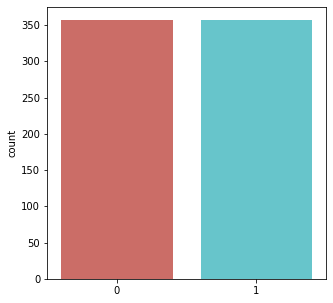

In [ ]:
from imblearn.over_sampling import SMOTE
X_b, y_b = SMOTE().fit_resample(x, y)

plt.subplots(figsize=(5,5))
graph = sns.countplot(y_b, palette ='hls')

i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 2, y_b.value_counts()[i], ha="center")
    i += 1

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [ ]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Get the accuracy score
rf_acc = accuracy_score(y_test, y_pred)*100
rf_pre = precision_score(y_test, y_pred, average='micro')
rf_recall = recall_score(y_test, y_pred, average='micro')
rf_f1_ = f1_score(y_test, y_pred, average='micro')

print("\nRF - Accuracy: {:.3f}.".format(rf_acc))
print("RF - Precision: {:.3f}.".format(rf_pre))
print("RF - Recall: {:.3f}.".format(rf_recall))
print("RF - F1_Score: {:.3f}.".format(rf_f1_))
print ('\n Clasification Report:\n', classification_report(y_test,y_pred))


RF - Accuracy: 95.614.
RF - Precision: 0.956.
RF - Recall: 0.956.
RF - F1_Score: 0.956.

 Clasification Report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.94        42
           1       0.94      1.00      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



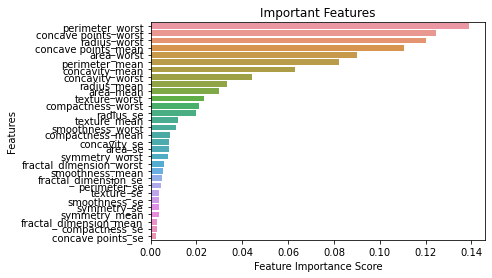

In [ ]:
import matplotlib.pyplot as plt
feature_imp = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Creating a bar plot, displaying only the top k features
sns.barplot(x=feature_imp[:], y=feature_imp.index[:])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Important Features")
plt.show()

In [ ]:
from numpy import arange
# The function to measure the quality of a split
criterion = ['gini', 'entropy']

# Class Weight
class_weight = ['balanced', 'dict'] 
             
# Number of trees in random forest
n_estimators = arange(200, 2000, 100)

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = arange(10, 110, 10)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
parameters = {'criterion': criterion,
               'class_weight': class_weight,
               'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(parameters)

{'criterion': ['gini', 'entropy'], 'class_weight': ['balanced', 'dict'], 'n_estimators': array([ 200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100, 1200,
       1300, 1400, 1500, 1600, 1700, 1800, 1900]), 'max_features': ['auto', 'sqrt'], 'max_depth': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]), 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
from sklearn.model_selection import GridSearchCV

## Building Grid Search algorithm with cross-validation and acc score.
rf_random = GridSearchCV(estimator=rf, param_grid=parameters, scoring='accuracy', cv=5, n_jobs=-1, verbose=10)
# Fit the random search model
rf_random.fit(X_train, y_train)

print("\nBest Parameters: ", rf_random.best_params_)
print("Best Scores: ", rf_random.best_score_) 


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

y_pred = rf_random.predict(X_test)

# Get the accuracy score
rf_acc = accuracy_score(y_test, y_pred)*100
rf_pre = precision_score(y_test, y_pred, average='micro')
rf_recall = recall_score(y_test, y_pred, average='micro')
rf_f1_ = f1_score(y_test, y_pred, average='micro')

print("\nRF - Accuracy: {:.3f}.".format(rf_acc))
print("RF - Precision: {:.3f}.".format(rf_pre))
print("RF - Recall: {:.3f}.".format(rf_recall))
print("RF - F1_Score: {:.3f}.".format(rf_f1_))
print ('\n Clasification Report:\n', classification_report(y_test,y_pred))
print()

df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.round(2)})
print(df1.head())

Fitting 5 folds for each of 25920 candidates, totalling 129600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   38.3s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   55.1s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  2